# Predecir el coste del seguro medico de una persona

- Importamos las librerias que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import loguniform
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score
from sklearn.feature_selection import f_classif, SelectKBest

- Paso 1 Cargar el DataFrame que vamos a usar

In [5]:
ruta = r"C:\Users\Alia\Documents\ProyectoAPI\aliasys-machine-learning\data\raw\medical_insurance_cost.csv"

df = pd.read_csv(ruta)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

- Realizamos el EDA

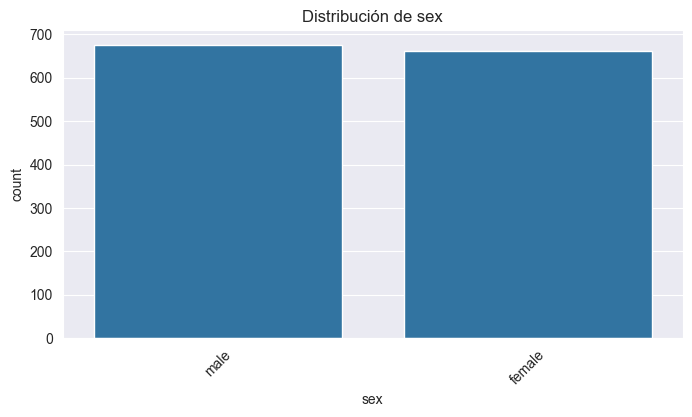

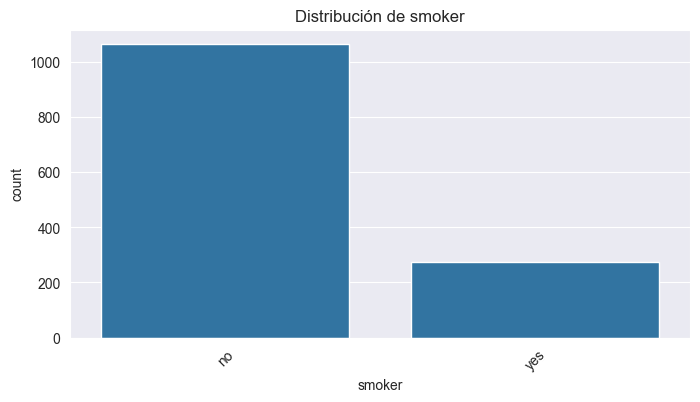

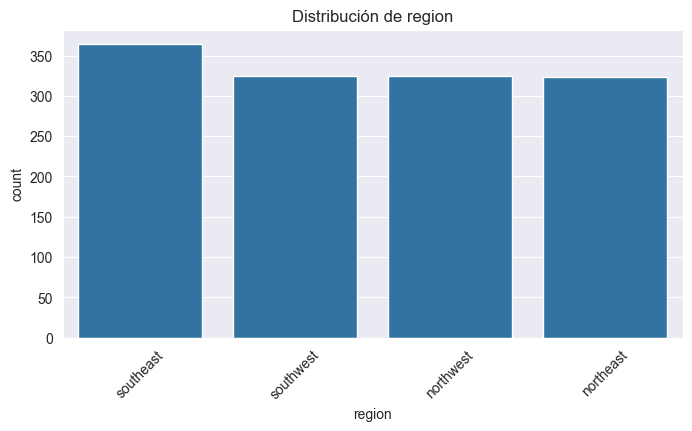

In [8]:
# Analisis de vaiables categóricas
categorical = df.select_dtypes(include='object').columns
for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

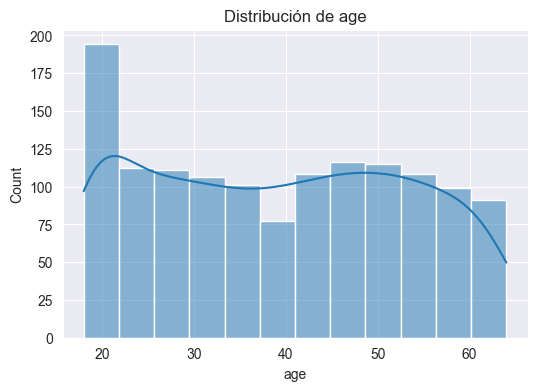

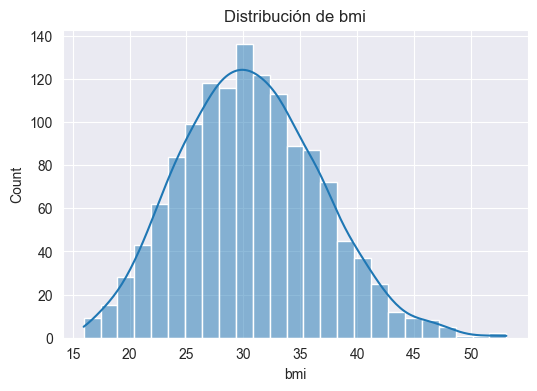

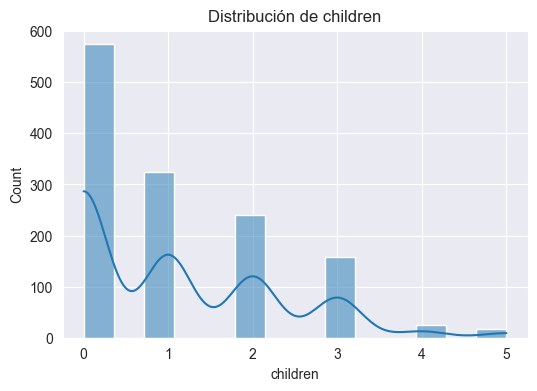

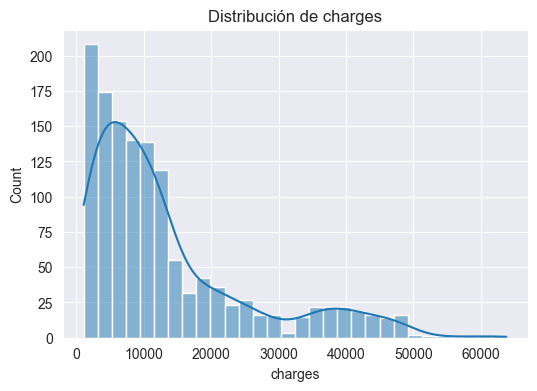

In [9]:
# Analizar las variables numéricas
numerical = df.select_dtypes(include=np.number).columns
for col in numerical:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

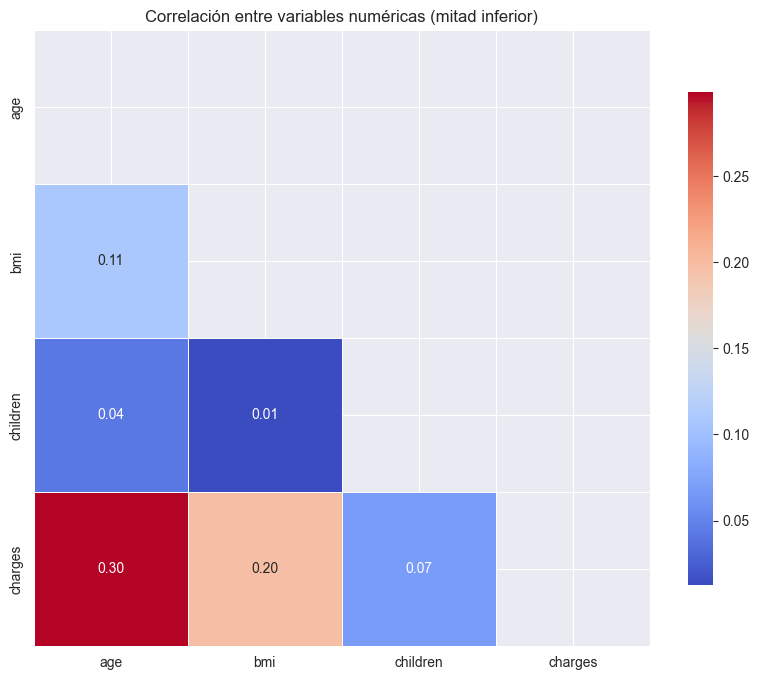

In [10]:
# Calcula la matriz de correlación
corr = df[numerical].corr()

# Crea la máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Dibuja el mapa de calor con la máscara
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlación entre variables numéricas (mitad inferior)')
plt.show()

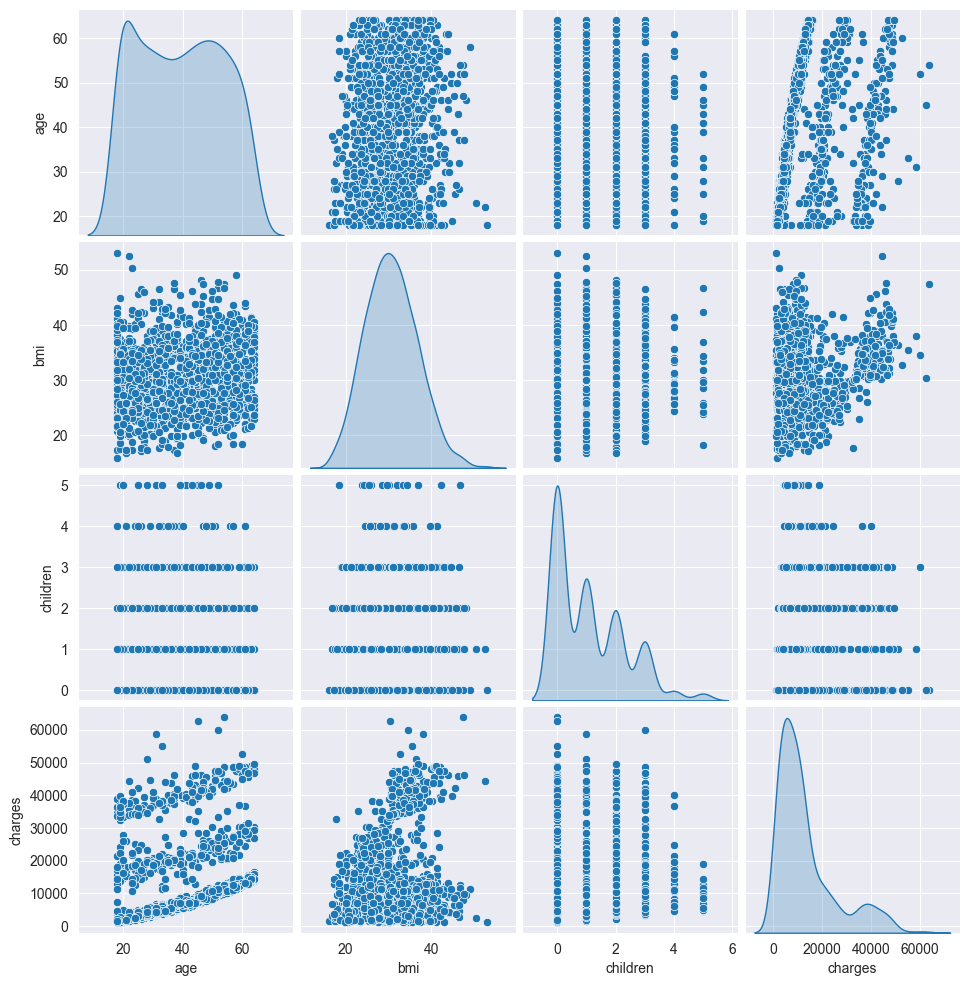

In [12]:
sns.pairplot(df, diag_kind='kde')